# **PROYECTO DE GRADO - MAESTRIA EN CIENCIA DE DATOS**
## Segmentación de profesionales de la salud del sector farmacéutico
### Santiago Reyes Zabaleta


## Gaussian Mixture Model
-------------------------------------------------------------------------------------

Silhouette Score para 'benigna': 0.15
Silhouette Score para 'maligna': 0.39


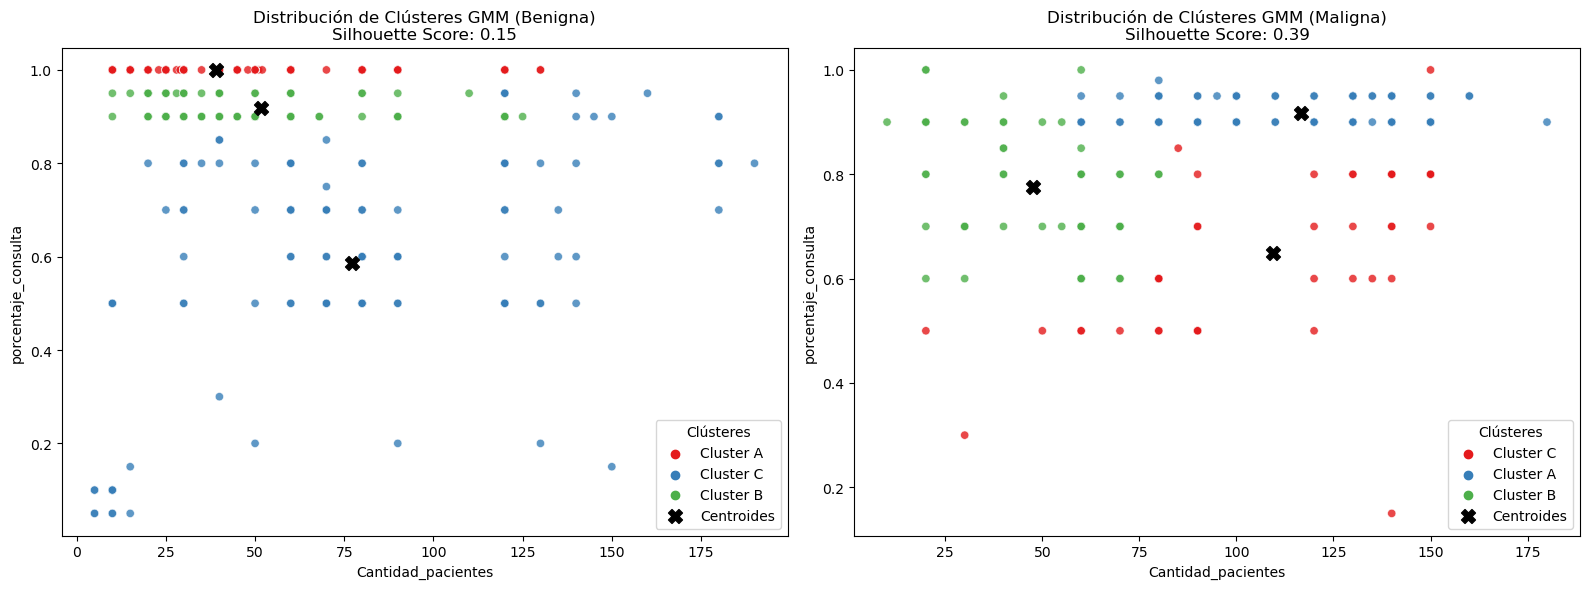

In [3]:
# Importar las bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

# Función para realizar la clusterización usando GMM
def clusterizacion_gmm_con_graficos_y_nombres(data, tipo_consulta, variables, n_components, cluster_names, ax):
    # Filtrar los datos según el tipo de consulta
    datos = data[data['tipo_consulta'] == tipo_consulta]

    if datos.empty:
        print(f"No hay datos para consultas de tipo '{tipo_consulta}'.")
        return None, None

    # Filtrar las columnas relevantes para la clusterización
    cluster_data = datos[variables]

    # Normalizar los datos
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(cluster_data)

    # Aplicar GMM
    gmm = GaussianMixture(n_components=n_components, random_state=42)
    cluster_labels = gmm.fit_predict(scaled_data)
    datos['Cluster'] = cluster_labels

    # Calcular el Silhouette Score
    if len(set(cluster_labels)) > 1:  # Silhouette Score requiere más de un clúster
        silhouette_avg = silhouette_score(scaled_data, cluster_labels)
        print(f"Silhouette Score para '{tipo_consulta}': {silhouette_avg:.2f}")
    else:
        silhouette_avg = None
        print(f"Silhouette Score no se puede calcular para '{tipo_consulta}' (un único clúster).")

    # Asignar nombres personalizados a los clústeres
    cluster_map = {i: cluster_names[i] if i < len(cluster_names) else f"Cluster {i}" for i in range(n_components)}
    datos['Cluster'] = datos['Cluster'].map(cluster_map)

    # Calcular los centroides
    centroides = datos.groupby('Cluster')[variables].mean()

    # Crear gráfico de dispersión
    sns.scatterplot(
        x=datos[variables[0]], 
        y=datos[variables[1]], 
        hue=datos['Cluster'], 
        palette='Set1', 
        alpha=0.8, 
        ax=ax
    )
    ax.scatter(
        centroides[variables[0]], 
        centroides[variables[1]], 
        color='black', 
        s=100, 
        marker='X', 
        label='Centroides'
    )
    ax.set_title(f"Distribución de Clústeres GMM ({tipo_consulta.capitalize()})\nSilhouette Score: {silhouette_avg:.2f}" if silhouette_avg else f"Distribución de Clústeres GMM ({tipo_consulta.capitalize()})")
    ax.set_xlabel(variables[0])
    ax.set_ylabel(variables[1])
    ax.legend(title="Clústeres", loc='best')

    # Retornar el DataFrame completo con los clústeres asignados y el Silhouette Score
    return datos, silhouette_avg

# Cargar los datos
data = pd.read_csv('data_cleaned.csv')

# Variables relevantes para el análisis
variables = ["Cantidad_pacientes", "porcentaje_consulta"]

# Nombres personalizados para los clústeres
nombres_clusters = ["Cluster A", "Cluster B", "Cluster C"]

# Crear una figura con dos subgráficas (1 fila, 2 columnas)
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Ejecutar el análisis para benignas con GMM
resultados_benignas_gmm, sil_benignas = clusterizacion_gmm_con_graficos_y_nombres(
    data, "benigna", variables, n_components=3, cluster_names=nombres_clusters, ax=axs[0])

# Ejecutar el análisis para malignas con GMM
resultados_malignos_gmm, sil_malignas = clusterizacion_gmm_con_graficos_y_nombres(
    data, "maligna", variables, n_components=3, cluster_names=nombres_clusters, ax=axs[1])

# Ajustar el diseño para evitar solapamiento
plt.tight_layout()
plt.show()

